<font size = 6> Week 1 Assignment Solutions</font>

<font face = Times size=4>

***Nash Equilibrium:***
    
Nash Equilibrium captures a steady state of the play of a strategic game in which each player holds the correct expectation about the other players' behavior and acts rationally. It does not attempt to examine the process by which a steady state is reached.
    
</font>

<font face = Times size=4>

***Definition 1 - Nash equilibrium:***
A Nash equilibrium of a strategic game $\left\langle N,\left(A_{i}\right)\right.$, $\left.\left(\succsim_{i}\right)\right\rangle$ is a profile $a^{*} \in A$ of actions with the property that for every player $i \in N$ we have
$$
\left(a_{-i}^{*}, a_{i}^{*}\right) \succsim_{i}\left(a_{-i}^{*}, a_{i}\right) \text { for all } a_{i} \in A_{i}
$$
Thus for $a^{*}$ to be a Nash equilibrium it must be that no player $i$ has an action yielding an outcome that he prefers to that generated when he chooses $a_{i}^{*}$, given that every other player $j$ chooses his equilibrium action $a_{j}^{*}$. Briefly, no player can profitably deviate, given the actions of the other players.  
    
</font>

<font face = Times size=4>

***Definition 2 - Pure strategy and pure strategy Nash equilibruim:*** A pure strategy simply involves making a choice of which action to play when the game starts. Pure strategy Nash equilibria are Nash equilibria where all players are playing pure strategies.
    
***Definition 3 - Mixed strategy and mixed strategy Nash equilibruim:*** A mixed strategy involves choosing a **probability** with which each action will be played once the game commences. Mixed strategy Nash equilibria are equilibria where at least one player is playing a mixed strategy.


</font>

<font face = Times size=4>

***Property :*** John Forbes Nash proved that there is an equilibrium for every finite game, however, not all have pure strategy Nash equilibria.
    

</font>

In [ ]:
# install the tools you will use later
!pip install --upgrade setuptools
!pip install --upgrade pip
!pip install nashpy

Requirement already up-to-date: setuptools in /usr/local/lib/python3.7/dist-packages (57.0.0)
     |████████████████████████████████| 1.6MB 5.4MB/s 
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1
  Created wheel for nashpy: filename=nashpy-0.0.21-py3-none-any.whl size=15281 sha256=dfde607fdd0c926d20af302c873c04fab4121d03e74d5d80c1bafc1051b785f9
  Stored in directory: /root/.cache/pip/wheels/02/08/62/cf4fa931e0a317d180936b266169a57f4bb4eb801465bbe8a1
Successfully built nashpy


<font face = Times size=4>

    
</font>

---

<font face = Times size = 4>
    
***Example1 - Prisoner's Dilemma:***

</font>

<div align="center">
<img src=https://miro.medium.com/max/875/1*0gzVtISbPIhodbqul6eBMw.jpeg width="40%"/>
    </div>
<font face = Times size = 3>
    <center> Fig1: Prisoner's Dilemma </center>
    </font>

In [ ]:
#@title Table1: Prisoner's Dilemma
# import module
from tabulate import tabulate
table = [['','','Prisoner B','Prisoner B'],
         ['','','confess','deny'],
         ['Prisoner A','confess','-3,-3','0,-6'],
         ['Prisoner A','deny','-6,0','-1,-1']]
print(tabulate(table,tablefmt='grid'))

+------------+---------+------------+------------+
|            |         | Prisoner B | Prisoner B |
+------------+---------+------------+------------+
|            |         | confess    | deny       |
+------------+---------+------------+------------+
| Prisoner A | confess | -3,-3      | 0,-6       |
+------------+---------+------------+------------+
| Prisoner A | deny    | -6,0       | -1,-1      |
+------------+---------+------------+------------+


In [ ]:
#@title Table1: Prisoner's Dilemma
import pandas as pd
import numpy as np
df2 = pd.DataFrame([['-3,-3','0,-6'],
                    ['-6,0','-1,-1']],
                  columns = [['Prisoner A','Prisoner A'],['confess','deny']],
                  index = [['Prisoner B','Prisoner B'],['confess','deny']])
df2

Prisoner A       
                      confess   deny
Prisoner B confess      -3,-3   0,-6
           deny          -6,0  -1,-1

<font face = Times size = 4>

    
Consider the following scenario: Two prisoners have partnered in a crime and they are being questioned in separate rooms. Each of them has 2 strategies - 

<center>a) Confess to the crime — Confess</center>
<center>b) Denial of being involved — Deny</center>

If only one prisoner confesses, then he would go free and the other prisoner would be booked and made to serve 6 months in prison. However, if both deny to the crime then they would need to serve 1 month each in prison and if they both confess then they would each need to serve 3 months in prison.
</font>

<font face = Times size = 4>
    
***Question:*** What is the equilibrium strategy profile?

</font>

<font face = Times size = 4>

***Answer and stategy:*** 

If Prisoner A confesses then it is better for Prisoner B to confess because his payoff of -3 > payoff of -6 . If Prisoner A denies then it is better for Prisoner B to confess because his payoff of 0 > payoff of -1 and he can get off scot free. Hence, in both the cases, irrespective of what prisoner B does it is better for prisoner A to confess always.
    
The same logic applies for prisoner B as well. Thus (Confess, Confess) is the Nash equilibrium in this game. This is also the dominant strategy equilibrium because each prisoner has an optimal strategy independent of the other player.

</font>

<font face = Times size = 4>
    
***Solve for the Nash equilibrium in game-1 with Python code:***
    
</font>    

In [ ]:
import nashpy as nash
import numpy as np

# Creater the game with the payoff matrix

A = np.array([[-3,0],
              [-6,-1]]) # A is the row player (in this case, prisoner)

B = np.array([[-3,-6],
              [0,-1]]) # B is the column player

game1 = nash.Game(A,B)

equilibria = game1.support_enumeration()
for eq in equilibria:
    print(eq)

(array([1., 0.]), array([1., 0.]))


<font face = Times size = 4>

***Interpretation of the results:*** 
    
The output can be interpreted as: Prisoner A chooses to confess as given by ‘1’ in the first position of the array and Prisoner B chooses to confess as given by ‘1’ in the first position of the array. Hence, as we saw earlier (Top, Left)/(Confess, Confess) is the NE or outcome of this "game".
    
</font>

---

<font face = Times size = 4>
    
***Example2 - Match pennies:***

</font>

<div align="center">
<img src="https://www.classes.cs.uchicago.edu/archive/2015/winter/12200-1/assignments/pa3/images/mp.png" width="40%"/>
    </div>
<font face = Times size = 3>
    <center> Fig2: Match pennies </center>
    </font>

In [ ]:
#@title Table2: Match pennies
# import module
from tabulate import tabulate
table = [['','','Player 2','Player 2'],
         ['','','Heads','Tails'],
         ['Player 1','Heads','1,-1','-1,1'],
         ['Player 1','Tails','-1,1','1,-1']]
print(tabulate(table,tablefmt='grid'))

+----------+-------+----------+----------+
|          |       | Player 2 | Player 2 |
+----------+-------+----------+----------+
|          |       | Heads    | Tails    |
+----------+-------+----------+----------+
| Player 1 | Heads | 1,-1     | -1,1     |
+----------+-------+----------+----------+
| Player 1 | Tails | -1,1     | 1,-1     |
+----------+-------+----------+----------+


In [ ]:
#@title Table2: Match pennies
import pandas as pd
import numpy as np
df2 = pd.DataFrame([['1,-1','-1,1'],
                    ['-1,1','1,-1']],
                  columns = [['Player 2','Player 2'],['Heads','Tails']],
                  index = [['Player 1','Player 1'],['Heads','Tails']])
df2

Player 2      
                  Heads Tails
Player 1 Heads     1,-1  -1,1
         Tails     -1,1  1,-1

<font face = Times size = 4>

Matching pennies is a game played between two players. Each player has a penny and must secretly turn the penny to heads or tails. The players then reveal their choices simultaneously. If the pennies match (both heads or both tails), then Even keeps both pennies, so wins one from Odd (+1 for Even, −1 for Odd). If the pennies do not match (one heads and one tails) Odd keeps both pennies, so receives one from Even (−1 for Even, +1 for Odd).

</font>

<font face = Times size = 4>
    
***Question:*** What will be the Nash equilibrium of this game?

</font>

<font face = Times size = 4>
    
***Hint:*** This game has no pure strategy Nash equilibrium since there is no pure strategy (heads or tails) that is a best response to a best response. In other words, there is no pair of pure strategies such that neither player would want to switch if told what the other would do. Instead, the unique Nash equilibrium of this game is in mixed strategies: each player chooses heads or tails with equal probability.

</font>

In [ ]:
import nashpy as nash
import numpy as np

# Creater the game with the payoff matrix

C = np.array([[1,-1],
              [-1,1]]) # C is the row player
              
D = np.array([[-1,1],
              [1,-1]]) # D is the column player

game2 = nash.Game(C,D)

# find the Nash equilibrium with Support Enumeration

equilibria = game2.support_enumeration()
for eq in equilibria:
    print(eq)

ModuleNotFoundError: ignored

<font face = Times size = 4>

***Interpretation of the results:*** 
    
Each player chooses heads or tails with equal probability = 50%, which matches our analysis above!
    
</font>

---

<font face = Times size = 4>
    
***Example3 - Battle of sex:***

</font>

<div align="center">
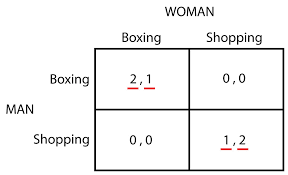
    </div>
<font face = Times size = 3>
    <center> Fig3: Battle of sex </center>
    </font>




In [ ]:
#@title Table3: Battle of sex
# import module
from tabulate import tabulate
table = [['','','WOMAN','WOMAN'],
         ['','','Boxing','Shopping'],
         ['MAN','Boxing','2,1','0,0'],
         ['MAN','Shopping','0,0','1,2']]
print(tabulate(table,tablefmt='grid'))

+-----+----------+--------+----------+
|     |          | WOMAN  | WOMAN    |
+-----+----------+--------+----------+
|     |          | Boxing | Shopping |
+-----+----------+--------+----------+
| MAN | Boxing   | 2,1    | 0,0      |
+-----+----------+--------+----------+
| MAN | Shopping | 0,0    | 1,2      |
+-----+----------+--------+----------+


In [ ]:
#@title Table3: Battle of sex
import pandas as pd
import numpy as np
df2 = pd.DataFrame([['2,1','0,0'],
                    ['0,0','1,2']],
                  columns = [['WOMAN','WOMAN'],['Boxing','Shopping']],
                  index = [['MAN','MAN'],['Boxing','Shopping']])
df2

WOMAN         
             Boxing Shopping
MAN Boxing      2,1      0,0
    Shopping    0,0      1,2

<font face = Times size = 4>

Imagine that Player 1 (MAN) and Player 2 (WOMAN) agreed to meet this evening, but cannot recall if they will be go boxing or a go shopping (and the fact that they forgot is common knowledge). Player 1 would prefer to go boxing. Player 2 would rather go shopping. Both would prefer to go to the same place rather than different ones. If they cannot communicate, where should they go?
    
</font>



<font face = Times size = 4>
    
***Question3.1:*** What will be the Nash equilibrium of this game?    
</font>    

<font face = Times size = 4>

***Answer and stategy:*** 
    
In this game, if player 2 chooses left , then player 1’s pay-offs are either 2 or 0. While, when player 2 chooses right, player 1’s pay-offs are 0 or 1. Hence, if player 2 chooses left player 1 should choose Top and if player 2 chooses Right then player 1 should choose Bottom. This, optimal choice of player 1 is dependent on what choice player 2 makes.
    
In this game, strategy (Top, Left) is a Nash equilibrium because if player 1 chooses Top, then the best thing for player 2 is to choose Left because his pay-off for choosing left is 1 as opposed to 0 if he chooses bottom. Similarly if player 2 chooses left then best choice for player 1 is to choose Top, because he will get a higher pay-off of 2 if he chooses Top versus he will get 0 if he chooses Bottom.

</font>

<font face = Times size = 4>
    
***Solve for the Nash equilibrium in game-2 with Python:***
    
</font>    

In [ ]:
# Create the payoff matrix

A = np.array([[2,0],[0,1]]) # A is the row player
B = np.array([[1,0],[0,2]]) # B is the column player

game2 = nash.Game(A,B)
game2

# Find the Nash Equilibrium with Support Enumeration
equilibria = game2.support_enumeration()
for eq in equilibria:
    print(eq)

(array([1., 0.]), array([1., 0.]))
(array([0., 1.]), array([0., 1.]))
(array([0.66666667, 0.33333333]), array([0.33333333, 0.66666667]))


<font face = Times size = 4>

***Interpratation of the results:*** 
    
**Line 1:"(array([1., 0.]), array([1., 0.]))"**
    
&nbsp; &nbsp; **Interpretation:** This is the first Nash equilibrium (Top, Left).Player A chooses strategy 1 i.e. ‘Top’ as given by ‘1’ in the first position of the first array and Player B chooses strategy 1 i.e. ‘Left’ as given by ‘1’ in the first position of the second array.

**Line 2:"(array([0., 1.]), array([0., 1.]))"**
    
&nbsp; &nbsp; **Interpretation:** This is the second Nash equilibrium (Bottom, Right).Player A chooses strategy 2 i.e. ‘Bottom’ as given by ‘1’ in the second position of the first array and Player B chooses strategy 2 i.e. ‘Right’ as given by ‘1’ in the second position of the second array.
    
**Line 3:"(array([0.66666667, 0.33333333]), array([0.33333333, 0.66666667])) "**
    
&nbsp; &nbsp; **Interpretation:** Player A plays strategy 1 i.e. “Top” 66.67% of the times and strategy 2 i.e. “Bottom” 33.33% of the times while Player B plays strategy 1 i.e. “Left” 33.33% of the times and strategy 2 i.e. “Right” 66.67% of the times.
Logically also, Player A should assign higher probability to “Top” and player B to “Right” because these give them higher pay-offs.
This equilibrium is a **mixed strategy Nash equilibrium**.
    
</font>

<font face = Times size = 4>
    
***Question3.2:*** Calculate the utility /pay-offs of Player A and Player B in the mixed strategy Nash equilibrium.

</font>

<font face = Times size = 4>

***Answer and stategy:*** 
    
Consider the game:     
$$(A, B) \in \mathbb{R}^{\operatorname{mxn}}$$
with $\sigma_{r}$ and $\sigma_{c}$ are the mixed strategies for the row and column players here A and B respectively. Then the utility/pay-off for the row player (A) is:
$$
u_{r}\left(\sigma_{r}, \sigma_{c}\right)=\sum_{i=1}^{m} \sum_{j=1}^{n} A_{i j} \sigma_{r i} \sigma_{c j}
$$
and utility/pay-off for the column player (B) is:
$$
u_{c}\left(\sigma_{r}, \sigma_{c}\right)=\sum_{i=1}^{m} \sum_{j=1}^{n} B_{i j} \sigma_{r i} \sigma_{c j}
$$
The probability of being in a given cell of (A or B) is
$$
\sigma_{r i} \sigma_{c j}
$$
The value of the cell is
$$
A_{i j} \text { or } B_{i j}
$$
    
In our case, utility to A will be: $0.67\times0.33\times2 +0.33\times0.67\times0+0.33\times0.67\times0+0.33\times0.67\times1 = \frac{2}{3}$
    
and for B it will be: $0.33\times0.67\times1 + 0.67\times0.33\times0 + 0.33\times0.67\times0+0.67\times0.33\times2 = \frac{2}{3}$
</font>

<font face = Times size = 4>
    
***Solve for the pay-offs of Player A and B in the mixed strategy Nash equilibrium with Python:***
    
</font>    

In [ ]:
# Calculate Utilities

sigma_r = np.array([.67,.33])
sigma_c = np.array([.33,.67])
pd = nash.Game(A, B)
pd[sigma_r, sigma_c]

array([0.6633, 0.6633])

<font face = Times size = 4>
    
The output of the code both equals to 2/3, which matches with our calculation above.

</font>